In [1]:
import matplotlib.pyplot as plt
import importlib
import fluctuating_env_model
importlib.reload(fluctuating_env_model)
stochastic_growth_rate, responsive_growth_rate = fluctuating_env_model.stochastic_growth_rate, fluctuating_env_model.responsive_growth_rate
markov_chain = fluctuating_env_model.ProbabilityMatrix
import numpy as np

## Toy example

Toy example for $2$ phenotypes and $2$ environments.

In [2]:
M = 1_0 # initial total number of individuals
X_0 = np.array([M / 2, M / 2]) # initial condition
times = np.array([100, 50]) # total existence times for every environment
f = np.array([10, 1e-3])
H = np.array([[1e-5, 1e-5],
              [1e-5, 1e-5]])
A = stochastic_growth_rate(f, H)

In [3]:
X = A.exponent_at_time(.4606) @ X_0
X

array([500.41326976,   5.00277595])

In [4]:
B = responsive_growth_rate(f, 5, 0)
B.show_matrix()

array([[0., 5.],
       [0., 5.]])

In [5]:
X = B.exponent_at_time(.4606) @ X_0
X

array([50.02074965, 50.02074965])

## Experiment
 for $k = 2$

In [136]:
total_num_of_steps = 10

In [137]:
def calculate_X(time, A, X_0):
    final_X = A.exponent_at_time(time) @ X_0
    return final_X

In [138]:
def initialize_growth_rate_matrices(k, f_array, H, H_m):
    stochastic_matrices = [stochastic_growth_rate(f_array[i], H) for i in range(k)]
    responsive_matrices = [responsive_growth_rate(f_array[i], H_m, i) for i in range(k)]
    return stochastic_matrices, responsive_matrices

In [139]:
def conduct_experiment(time, stochastic_matrix, responsive_matrix, curr_X_st, curr_X_rs):
    stochastic_result = calculate_X(time, stochastic_matrix, curr_X_st)
    responsive_result = calculate_X(time, responsive_matrix, curr_X_rs)
    return stochastic_result, responsive_result

In [140]:
def run_experiments(k, f_array, H, H_m, times, X_0, markov_chain, steps = 100):
    results = {'stochastic': [], 'responsive': []}
    stochastic_matrices, responsive_matrices = initialize_growth_rate_matrices(k, f_array, H, H_m)
    current_state = np.zeros(k)
    current_state[0] = 1
    stochastic_result, responsive_result = X_0, X_0

    # Perform the fixed number of steps on the Markov chain
    environment_sequence = []
    for _ in range(steps):
        current_state = markov_chain.transition(current_state)
        next_environment = np.argmax(current_state)
        environment_sequence.append(next_environment)
        #print(environment_sequence)
    for env in environment_sequence:
        stochastic_result, responsive_result = conduct_experiment(times[env], stochastic_matrices[env], responsive_matrices[env], stochastic_result, responsive_result)
        results['stochastic'].append(stochastic_result)
        results['responsive'].append(responsive_result)

    return results

In [141]:
def compare_final_species_and_ratios(results):
    final_species_counts = {'stochastic': [], 'responsive': []}
    phenotype_ratios = {'stochastic': [], 'responsive': []}

    for model_type in ['stochastic', 'responsive']:
        for result in results[model_type]:
            final_X = result
            total_species = np.sum(final_X)
            final_species_counts[model_type].append(total_species)

            ratios = final_X / total_species
            phenotype_ratios[model_type].append(ratios)

    return final_species_counts, phenotype_ratios

In [142]:
k = 2
M = 50 * k
X_0 = np.full(k, M / k)
times = np.array([10, 20])

f_array = np.full((k, k), .05)
for i in range(k):
    f_array[i, i::k] = 3

H = np.array([[.05, .05],
              [1e-6, .01]])

H_m = 2

m_c = markov_chain(k)

In [154]:
f_array

array([[3.  , 0.05],
       [0.05, 3.  ]])

In [143]:
results = run_experiments(k, f_array, H, H_m, times, X_0, m_c, steps=total_num_of_steps)

In [144]:
final_species_counts, phenotype_ratios = compare_final_species_and_ratios(results)

It is indeed, exponential.

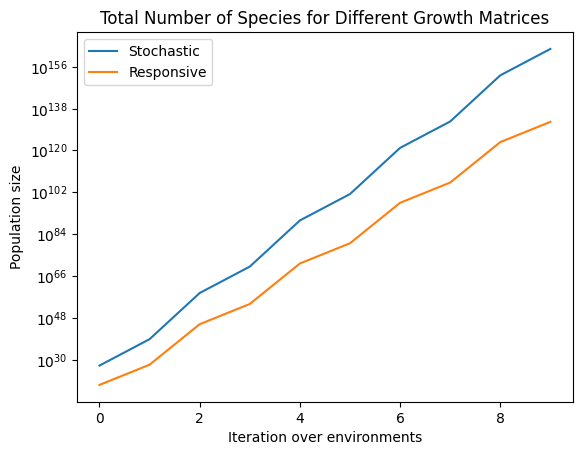

In [145]:
plt.plot(final_species_counts['stochastic'], label='Stochastic')
plt.plot(final_species_counts['responsive'], label='Responsive')
plt.xlabel('Iteration over environments')
plt.ylabel('Population size')
plt.title('Total Number of Species for Different Growth Matrices')
plt.yscale('log')
plt.legend()
plt.show()

In [146]:
times = np.array([.5, .5])

In [147]:
results = run_experiments(k, f_array, H, H_m, times, X_0, m_c, steps=total_num_of_steps)

In [148]:
final_species_counts, phenotype_ratios = compare_final_species_and_ratios(results)

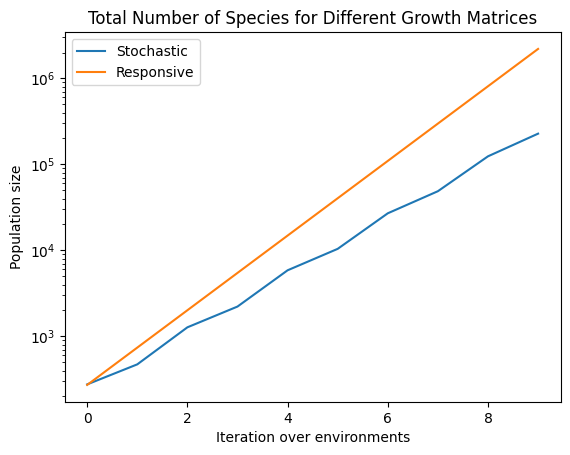

In [149]:
plt.plot(final_species_counts['stochastic'], label='Stochastic')
plt.plot(final_species_counts['responsive'], label='Responsive')
plt.xlabel('Iteration over environments')
plt.ylabel('Population size')
plt.title('Total Number of Species for Different Growth Matrices')
plt.yscale('log')
plt.legend()
plt.show()